<a href="https://colab.research.google.com/github/harshitha13732/DL-CNN-/blob/main/Deep_Learning_Project_(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

# Loading & Preprocessing the DS

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Building CNN Model

In [ ]:
model = models.Sequential([layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D((2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D((2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu'),
                           layers.BatchNormalization(),

                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.5),
                           layers.Dense(10),
                           ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Data Augmentation & Compiling & Training

In [ ]:
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 164ms/step - accuracy: 0.3066 - loss: 2.1227 - val_accuracy: 0.4093 - val_loss: 1.7946
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.4700 - loss: 1.4770 - val_accuracy: 0.4413 - val_loss: 1.6408
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.5253 - loss: 1.3351 - val_accuracy: 0.5723 - val_loss: 1.2460
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.5568 - loss: 1.2428 - val_accuracy: 0.6169 - val_loss: 1.0604
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.5840 - loss: 1.1792 - val_accuracy: 0.6222 - val_loss: 1.0924
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.5997 - loss: 1.1336 - val_accuracy: 0.6347 - val_loss: 1.0192
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.6148 - loss: 1.0935 - val_accuracy: 0.6413 - val_loss: 1.0395
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 159ms/step - accuracy: 0.6209 - loss: 1.07

# Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test Accuracy: {test_acc:.2f}")

313/313 - 4s - 14ms/step - accuracy: 0.7585 - loss: 0.6885

 Test Accuracy: 0.76


# Visualizing Accuracy & Loss

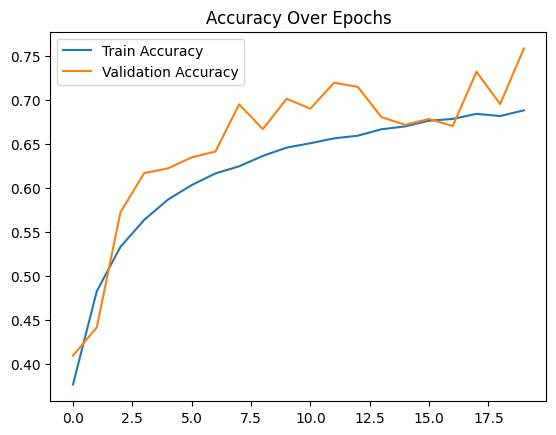

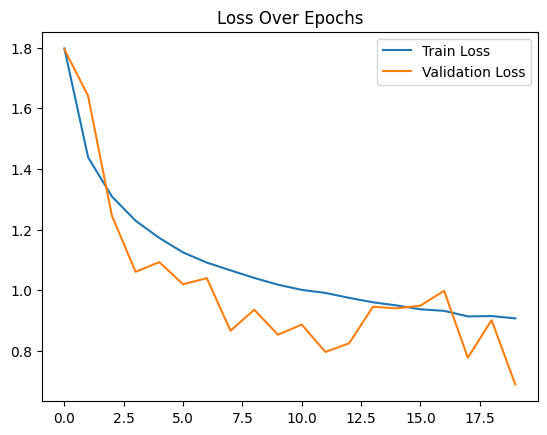

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Testing with Sample Predictions

In [ ]:
import numpy as np

probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


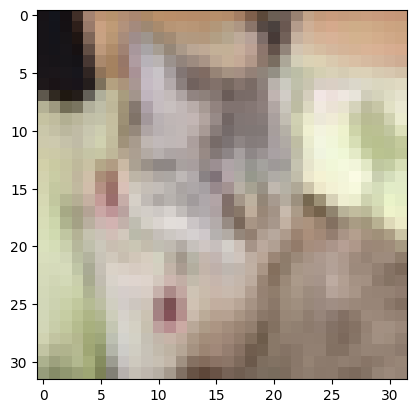

In [ ]:
plt.imshow(x_test[i], interpolation= 'nearest')

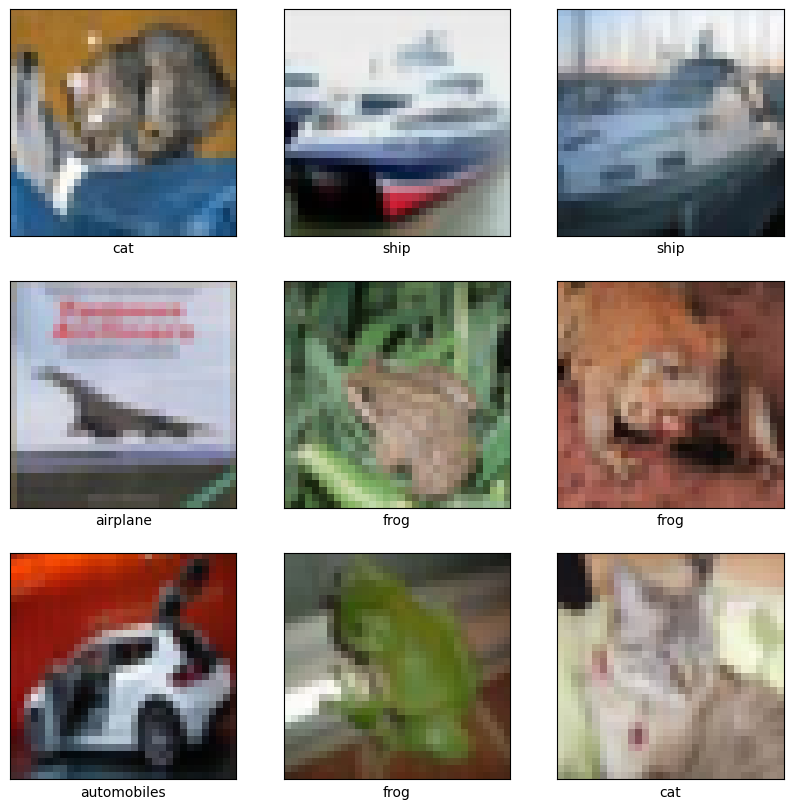

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], interpolation= 'nearest')
  plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()